# Nama : Febryan Rizki Hidayatullah
# Kelas : TI-3F/12
# Nim : 2141720059
---

# 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

### Langkah 1 : import data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Langkah 2 : Baca Data

In [2]:
# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Langkah 3 : bagi data variabel bebas(fitur) dan variabel target(biaya medis personal)

variabel bebas = age sex bmi children smoker region
variabel target = charges

c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


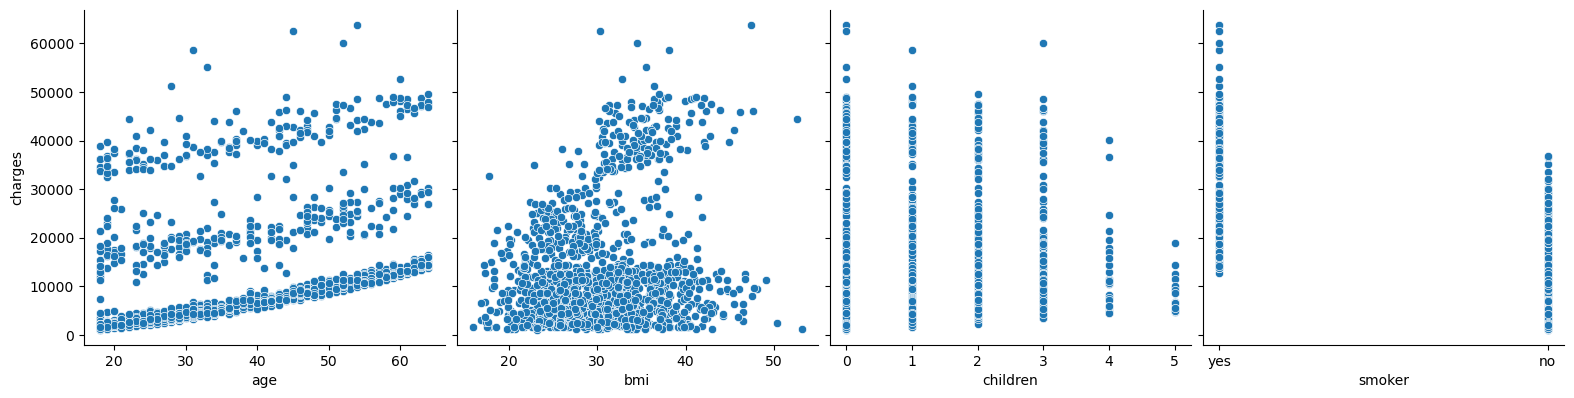

In [3]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'bmi','children', 'smoker'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_23600\1286170800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


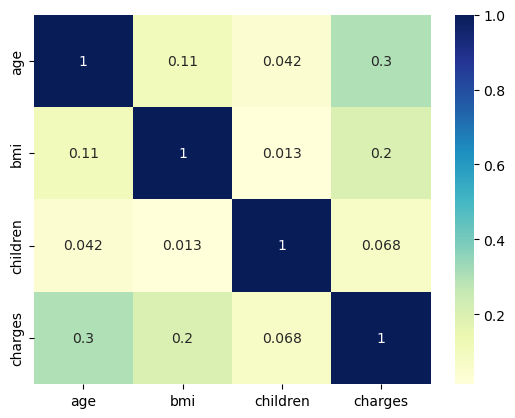

In [4]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [5]:
from sklearn.model_selection import train_test_split
# proses data smoke
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

x = data[['age', 'bmi', 'smoker']]
y = data['charges']

# Bagi data menjadi training set dan testing set (opsional)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

# 3. Lakukan feature scaling jika diperlukan.

tidak perlu

# 4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [6]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model regresi linear berganda
model = LinearRegression()

# 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [7]:
# Latih model dengan data pelatihan
model.fit(x_train, y_train)

# Membuat prediksi dari set test
y_pred = model.predict(x_test)

# 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

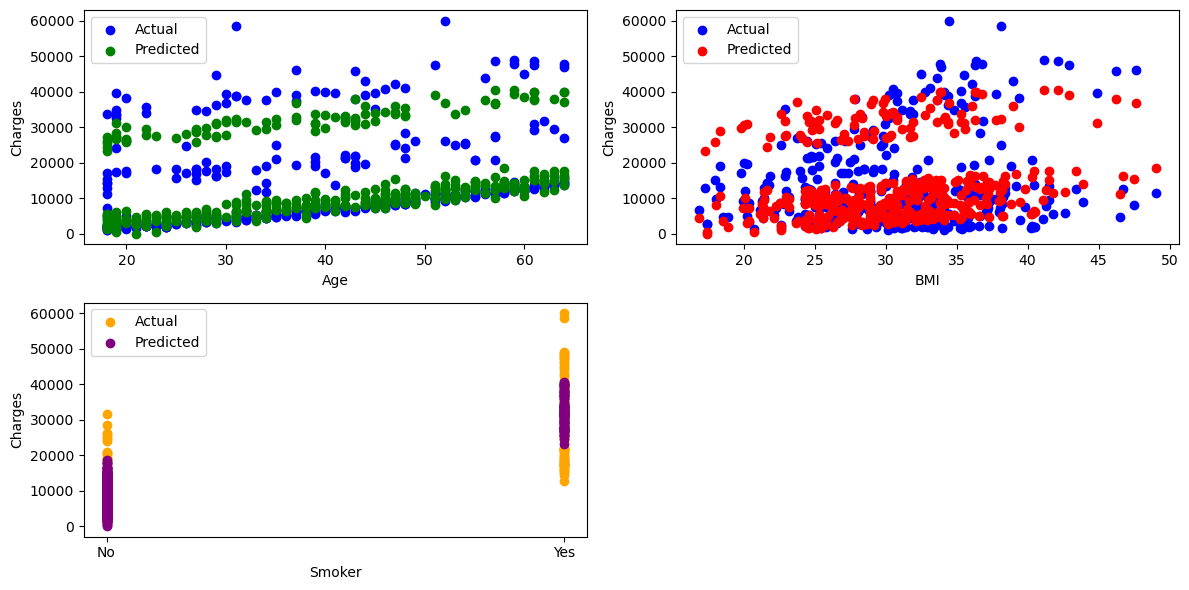

R-squared: 0.7777782410843159
Mean Squared Error (MSE): 32266086.037517138
Mean Absolute Error (MAE): 3934.947395925351


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred) # menghitung mse
r2 = r2_score(y_test, y_pred) # menghitung r squared
mae = mean_absolute_error(y_test, y_pred) # menghitung mae


# Visualisasi hasil
plt.figure(figsize=(12, 6))

# Sebar plot untuk 'usia' vs. 'biaya'
plt.subplot(2, 2, 1)
plt.scatter(x_test['age'], y_test, color='blue', label='Actual')
plt.scatter(x_test['age'], y_pred, color='green', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'bmi' vs. 'biaya'
plt.subplot(2, 2, 2)
plt.scatter(x_test['bmi'], y_test, color='blue', label='Actual')
plt.scatter(x_test['bmi'], y_pred, color='red', label='Predicted')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

# Sebar plot untuk 'smoker' vs. 'charges'
plt.subplot(2, 2, 3)
plt.scatter(x_test['smoker'], y_test, color='orange', label='Actual')
plt.scatter(x_test['smoker'], y_pred, color='purple', label='Predicted')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend()

# Tampilkan semua plot
plt.tight_layout()
plt.show()
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")